In [3]:
import numpy as np
from scipy import interpolate
from scipy.special import lpn
from scipy.special import lpmn
from classy import Class
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# P1.1

In [4]:
# Set up the input parameters #
Omega_m = 0.3 # matter density parameter
Omega_b = 0.043 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.96 # scalar spectral index
sigma8 = 0.81 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 50.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo = Class()
Cosmo.set(commonsettings)
Cosmo.compute()
# several functions on can call from python class object Cosmo #
Hubble = Cosmo.Hubble(0.0) #Takes redshift as input
print(Hubble)
print(Cosmo.angular_distance(1.0))
print(Cosmo.pk(1.0, 0.2))

0.00023349486663870643
1651.762983151996
561.9030100233164


In [5]:
c = 3e5 # km/s
Hubble_param = Hubble*c
print(Hubble_param)

70.04845999161194


In [6]:
redshift = np.linspace(0.0, 2.0, 100)
Hubble_redshift = Cosmo.Hubble(redshift)*c # Since the code gives Hubble output as Hubble parameter divided by c
Angular_dist_redshift = Cosmo.angular_distance(redshift)

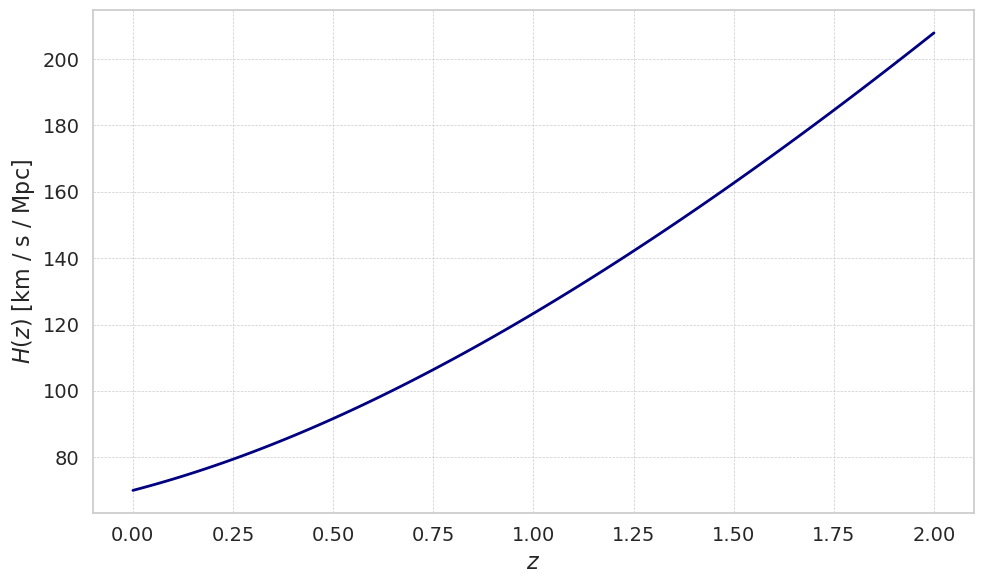

In [7]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Plot
plt.plot(redshift, Hubble_redshift, color='navy', linewidth=2)

# labels
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$H(z)$ [km / s / Mpc]', fontsize=16)

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=14)

# Tight layout and display
plt.tight_layout()

# Save as high-res image
plt.savefig("hubble_vs_redshift.png", dpi=300, bbox_inches='tight')

plt.show()

In [8]:
def comoving_dist(d_A, z):
    return d_A*(1+z)

comoving_dist_redshift = comoving_dist(Angular_dist_redshift, redshift)

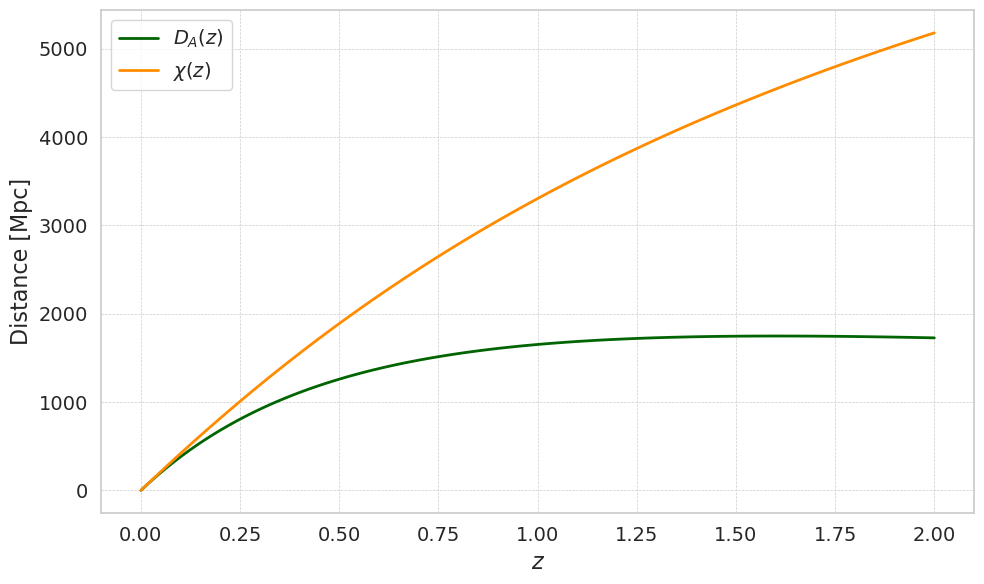

In [9]:
#sns.set(style='whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(redshift, Angular_dist_redshift, label='$D_A (z)$', color='darkgreen', linewidth=2)
plt.plot(redshift, comoving_dist_redshift, label=r'$\chi (z)$', color='darkorange', linewidth=2)

# labels
plt.xlabel('$z$', fontsize=16)
plt.ylabel('Distance [Mpc]', fontsize=16)

# Grid, ticks, legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)

# Layout, save, show
plt.tight_layout()
plt.savefig("cosmo_distances_vs_redshift.png", dpi=300, bbox_inches='tight')
plt.show()


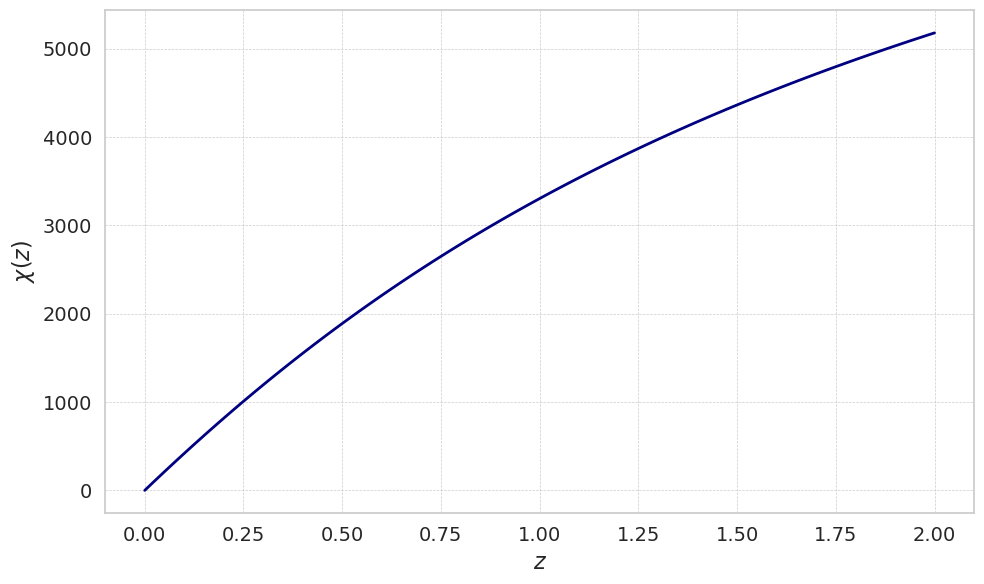

In [10]:
#sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Plot
plt.plot(redshift, comoving_dist_redshift, color='navy', linewidth=2)

# labels
plt.xlabel('$z$', fontsize=16)
plt.ylabel(r'$\chi (z)$', fontsize=16)

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=14)

# Tight layout and display
plt.tight_layout()

# Save as high-res image
plt.savefig("comoving_vs_redshift.png", dpi=300, bbox_inches='tight')

plt.show()

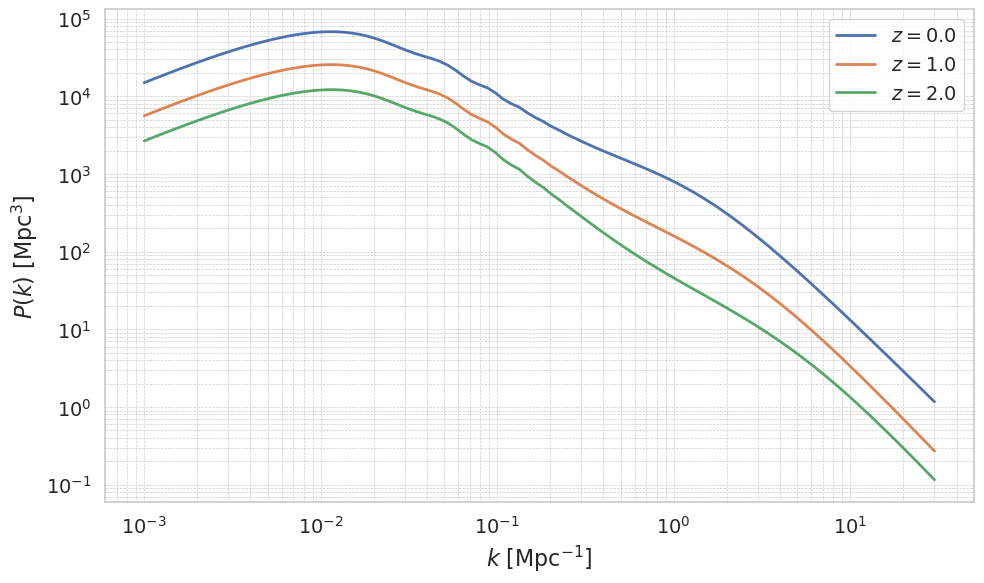

In [11]:
k_arr = np.logspace(-3, np.log10(30), 100)

# Plot P(k) for different redshifts
plt.figure(figsize=(10, 6))

for z in [0.0, 1.0, 2.0]:
    pk = [Cosmo.pk(k, z) for k in k_arr]
    plt.plot(k_arr, pk, label=fr'$z = {z}$', linewidth=2)

# Log scales
plt.xscale('log')
plt.yscale('log')

# Labels
plt.xlabel(r'$k$ [Mpc$^{-1}$]', fontsize=16)
plt.ylabel(r'$P(k)$ [Mpc$^3$]', fontsize=16)

# Ticks, grid, legend
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=14)

# Layout and save
plt.tight_layout()
plt.savefig("matter_power_spectrum.png", dpi=300, bbox_inches='tight')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------

# P1.2

In [12]:
# Set up the input parameters #
Omega_m = 0.279 # matter density parameter
Omega_b = 0.046 # baryon density parameter
h = 0.7 # reduced Hubble parameter H/100
n_s = 0.97 # scalar spectral index
sigma8 = 0.82 # characterisation of power spectrum amplitude
nonlinear_model = "Halofit" # nonlinear modelling recipe
kmax_pk = 250.0
z_max_pk = 2.5
# Write down the input dictionary #
commonsettings = {
'N_ur' :3.046,
'N_ncdm' :0,
'output' :'mPk',
'P_k_max_1/Mpc' :kmax_pk,
'omega_b' :Omega_b * h**2,
'h' :h,
'n_s' :n_s,
'sigma8' :sigma8,
'omega_cdm' :(Omega_m - Omega_b) * h**2,
'Omega_k' :0.0,
'Omega_fld' :0.0,
'Omega_scf' :0.0,
'YHe' :0.24,
'z_max_pk' :z_max_pk,
'non linear' :nonlinear_model,
'write warnings':'yes' }
# Set up the CLASS object and compute it #
Cosmo_T17 = Class()
Cosmo_T17.set(commonsettings)
Cosmo_T17.compute()
# several functions on can call from python class object Cosmo #
Hubble = Cosmo_T17.Hubble(0.0)
print(Hubble)
print(Cosmo_T17.angular_distance(1.0))
print(Cosmo_T17.pk(1.0, 0.2))

0.00023349486663870643
1672.860203880349
584.957940277236


# P1.Optional

In [13]:
# Write your code here. Add more coding cells as needed.

# P1.3

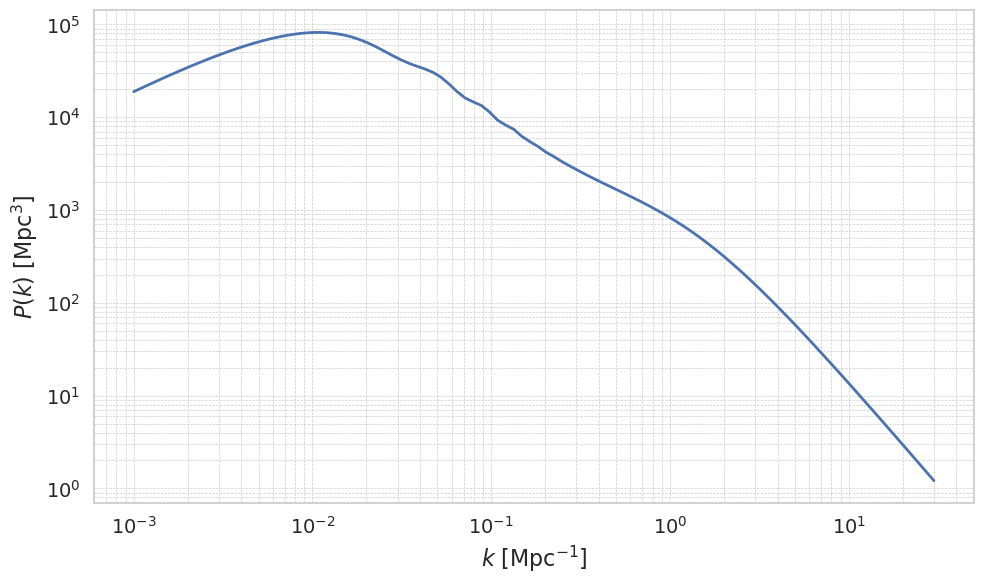

In [14]:
k_arr = np.logspace(-3, np.log10(30), 100)

# Plot P(k) for different redshifts
plt.figure(figsize=(10, 6))

pk = [Cosmo_T17.pk(k, 0) for k in k_arr]
plt.plot(k_arr, pk, linewidth=2)

# Log scales
plt.xscale('log')
plt.yscale('log')

# Labels
plt.xlabel(r'$k$ [Mpc$^{-1}$]', fontsize=16)
plt.ylabel(r'$P(k)$ [Mpc$^3$]', fontsize=16)

# Ticks, grid, legend
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Layout and save
plt.tight_layout()
plt.savefig("matter_power_spectrum_T17C_cosmology.png", dpi=300, bbox_inches='tight')
plt.show()

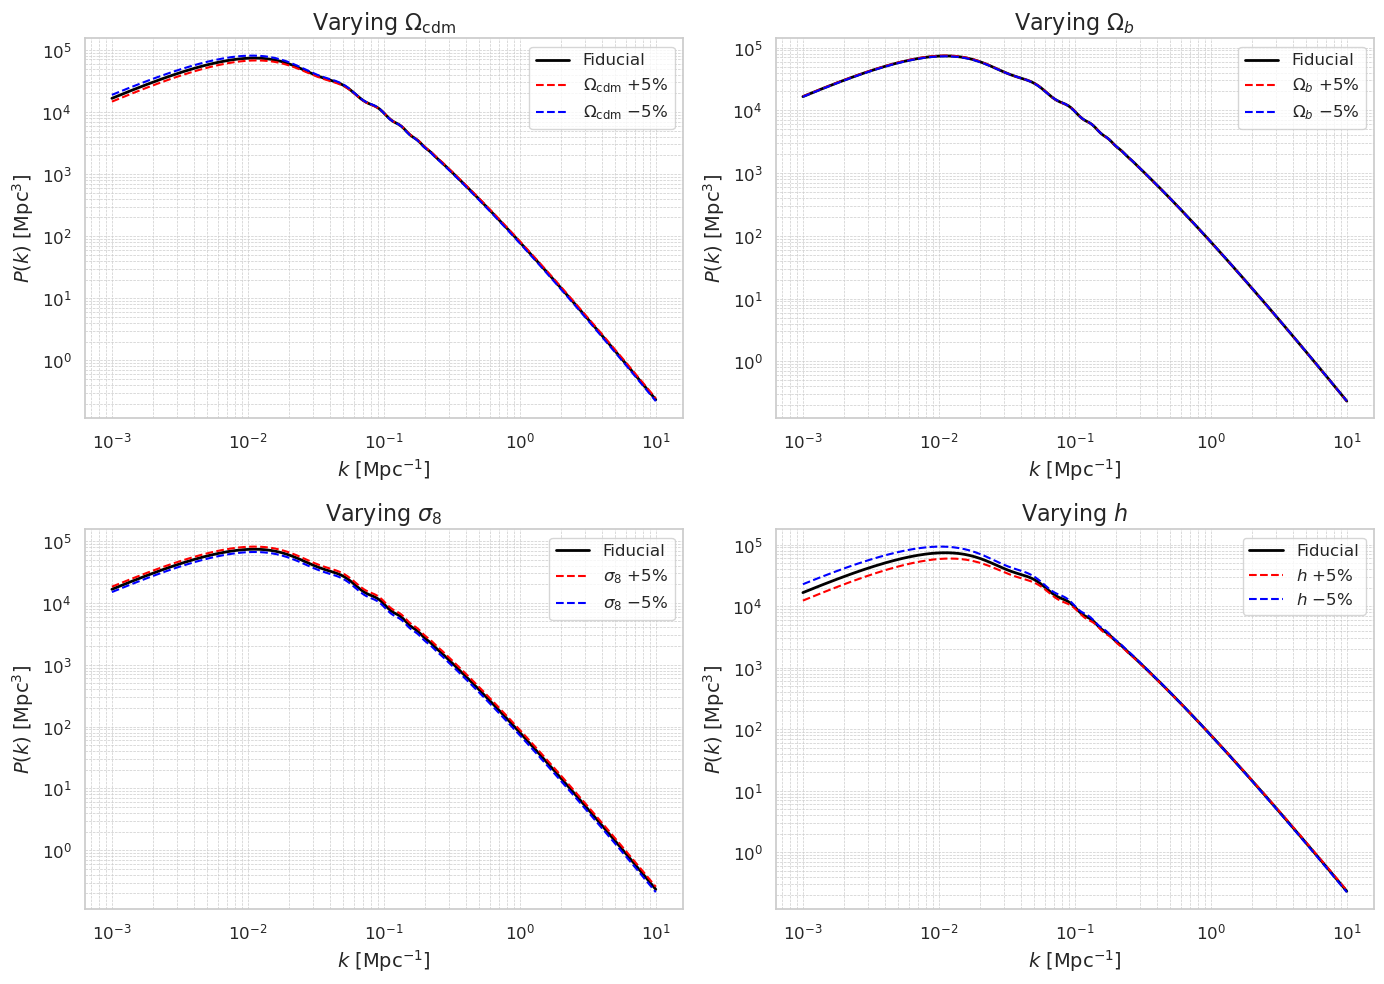

In [15]:
# Define k array
k_arr = np.logspace(-3, np.log10(10), 200)

# Define fiducial parameters
commonsettings = {
    'output': 'mPk',
    'P_k_max_1/Mpc': 10.0,
    'z_pk': '0.0',
    'omega_b': 0.0224,
    'omega_cdm': 0.12,
    'h': 0.7,
    'sigma8': 0.8,
    'n_s': 0.96,
}

# Parameters to vary
params = ['omega_cdm', 'omega_b', 'sigma8', 'h']
labels = {
    'omega_cdm': r'$\Omega_{\rm cdm}$',
    'omega_b': r'$\Omega_b$',
    'sigma8': r'$\sigma_8$',
    'h': r'$h$',
}

# Prepare 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, param in enumerate(params):
    ax = axs[i]
    
    # Fiducial spectrum
    settings_fid = commonsettings.copy()
    cosmo_fid = Class()
    cosmo_fid.set(settings_fid)
    cosmo_fid.compute()
    pk_fid = [cosmo_fid.pk(k, 0.0) for k in k_arr]
    cosmo_fid.struct_cleanup()
    cosmo_fid.empty()

    ax.loglog(k_arr, pk_fid, label='Fiducial', color='black', linewidth=2)

    # Varying ±5%
    for factor, label_text, color in [(1.05, '+5%', 'red'), (0.95, '−5%', 'blue')]:
        settings_var = commonsettings.copy()
        settings_var[param] = factor * commonsettings[param]

        # Adjust physical densities if h changes
        if param == 'h':
            settings_var['omega_b'] = commonsettings['omega_b'] / commonsettings['h']**2 * settings_var['h']**2
            settings_var['omega_cdm'] = commonsettings['omega_cdm'] / commonsettings['h']**2 * settings_var['h']**2

        cosmo_var = Class()
        cosmo_var.set(settings_var)
        cosmo_var.compute()
        pk_var = [cosmo_var.pk(k, 0.0) for k in k_arr]
        cosmo_var.struct_cleanup()
        cosmo_var.empty()

        ax.loglog(k_arr, pk_var, linestyle='--', color=color, label=f'{labels[param]} {label_text}')

    # Axis formatting
    ax.set_xlabel(r'$k$ [Mpc$^{-1}$]', fontsize=14)
    ax.set_ylabel(r'$P(k)$ [Mpc$^3$]', fontsize=14)
    ax.set_title(f'Varying {labels[param]}', fontsize=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.tick_params(labelsize=12)
    ax.legend(fontsize=12)

# Layout and save
plt.tight_layout()
plt.savefig("parameter_variation_pk_grid.png", dpi=300, bbox_inches='tight')
plt.show()

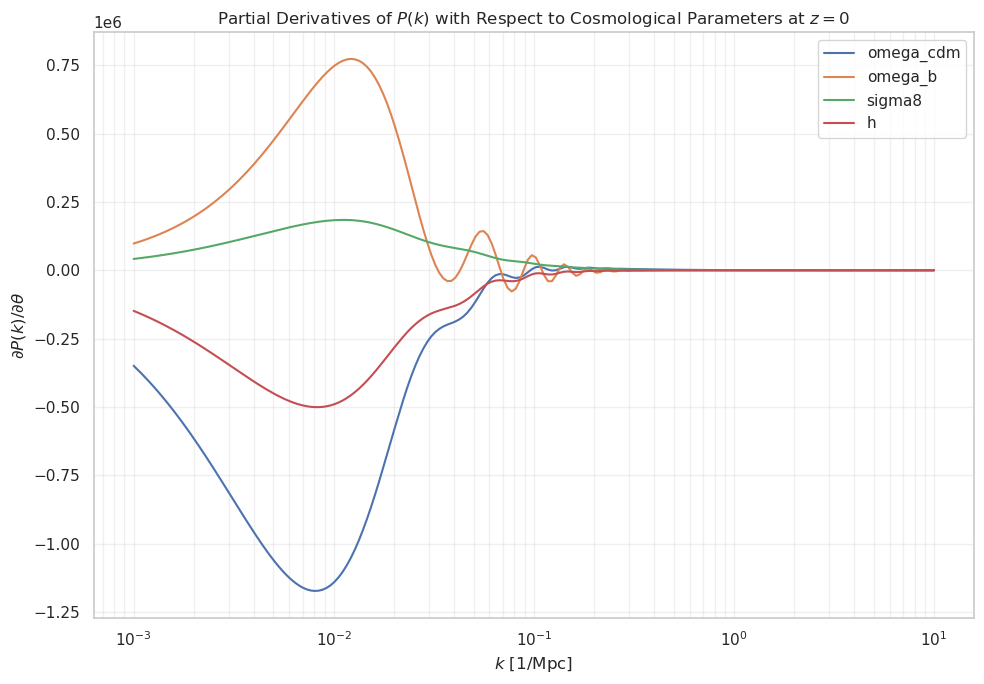

In [16]:
def compute_pk(commonsettings, k_arr, z=0.0):
    cosmo = Class()
    cosmo.set(commonsettings)
    cosmo.compute()
    pk = np.array([cosmo.pk(k, z) for k in k_arr])
    cosmo.struct_cleanup()
    cosmo.empty()
    return pk

def compute_partial_derivative(param_name, commonsettings, k_arr, z=0.0, delta_frac=0.05):
    settings_fid = commonsettings.copy()
    theta_fid = settings_fid[param_name]
    delta_theta = delta_frac * theta_fid

    # Plus 5%
    settings_plus = settings_fid.copy()
    settings_plus[param_name] = theta_fid + delta_theta
    if param_name == 'h':
        settings_plus['omega_b'] = commonsettings['omega_b'] / commonsettings['h']**2 * settings_plus['h']**2
        settings_plus['omega_cdm'] = commonsettings['omega_cdm'] / commonsettings['h']**2 * settings_plus['h']**2

    # Minus 5%
    settings_minus = settings_fid.copy()
    settings_minus[param_name] = theta_fid - delta_theta
    if param_name == 'h':
        settings_minus['omega_b'] = commonsettings['omega_b'] / commonsettings['h']**2 * settings_minus['h']**2
        settings_minus['omega_cdm'] = commonsettings['omega_cdm'] / commonsettings['h']**2 * settings_minus['h']**2

    pk_plus = compute_pk(settings_plus, k_arr, z)
    pk_minus = compute_pk(settings_minus, k_arr, z)

    partial_derivative = (pk_plus - pk_minus) / (2 * delta_theta)
    return partial_derivative

# Example usage:
params = ['omega_cdm', 'omega_b', 'sigma8', 'h']
partial_derivatives = {}
for param in params:
    partial_derivatives[param] = compute_partial_derivative(param, commonsettings, k_arr)

# Plotting all partial derivatives together
plt.figure(figsize=(10, 7))
for param, pd in partial_derivatives.items():
    plt.semilogx(k_arr, pd, label=param)
plt.xlabel(r'$k$ [1/Mpc]')
plt.ylabel(r'$\partial P(k)/\partial \theta$')
plt.title('Partial Derivatives of $P(k)$ with Respect to Cosmological Parameters at $z=0$')
plt.legend()
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

# P1.4

In [17]:
def lensing_kernel_qz(z, z_s, Omega_m, H0, chi, chi_s): # Equation (66) - section 5.2, page 21
    c = 299792.458  # speed of light in km/s
    a = 1.0 / (1.0 + z)
    q = np.zeros_like(z)
    mask = chi < chi_s
    prefactor = (3 * (H0**2) * Omega_m) / (2 * c**2)
    q[mask] = prefactor * chi[mask] / a[mask] * (chi_s - chi[mask]) / chi_s # Solution to T4 problem (see manual)
    return q

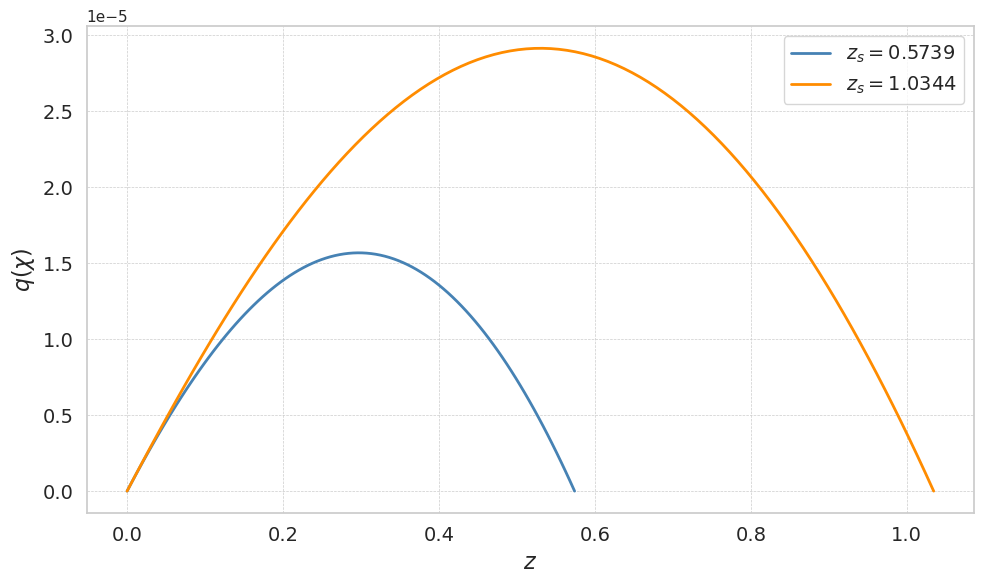

In [18]:
z_s_1 = 0.5739
z_s_2 = 1.0344

Angular_dist_z_s_1 = Cosmo_T17.angular_distance(z_s_1)
Angular_dist_z_s_2 = Cosmo_T17.angular_distance(z_s_2)

comov_z_1 = Angular_dist_z_s_1 *(1+z_s_1)
comov_z_2 = Angular_dist_z_s_2 *(1+z_s_2)


redshift_1 = np.linspace(0.0, z_s_1, 100)
redshift_2 = np.linspace(0.0, z_s_2, 100)

Angular_dist_1 = Cosmo_T17.angular_distance(redshift_1)
Angular_dist_2 = Cosmo_T17.angular_distance(redshift_2)

#def comoving_dist(d_A, z):
 #   return d_A*(1+z)

comoving_dist_1 = comoving_dist(Angular_dist_1, redshift_1)
comoving_dist_2 = comoving_dist(Angular_dist_2, redshift_2)

H0 = Cosmo_T17.Hubble(0.0)*c
Omega_m = 0.279
q_s_1 = lensing_kernel_qz(redshift_1, z_s_1, Omega_m, H0, comoving_dist_1, comov_z_1)
q_s_2 = lensing_kernel_qz(redshift_2, z_s_2, Omega_m, H0, comoving_dist_2, comov_z_2)


# Plotting
plt.figure(figsize=(10, 6))

plt.plot(redshift_1, q_s_1, label=r'$z_s = 0.5739$', color='steelblue', linewidth=2)
plt.plot(redshift_2, q_s_2, label=r'$z_s = 1.0344$', color='darkorange', linewidth=2)

# Labels
plt.xlabel('$z$', fontsize=16)
plt.ylabel(r'$q(\chi)$', fontsize=16)

# Grid, ticks, legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', labelsize=14)
plt.legend(fontsize=14)

# Layout and save
plt.tight_layout()
plt.savefig("lensing_kernel_vs_redshift.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
print(comov_z_1)

2142.8264314003654


In [20]:
z_peak_1 = redshift_1[np.argmax(q_s_1)]
z_peak_2 = redshift_2[np.argmax(q_s_2)]

print(z_peak_1)
print(z_peak_2)

0.2956454545454545
0.5328727272727273


------------------------------------------------------------------------------------------------------------------------------------------------------

# P1.5

In [21]:
def projected_pk(chi_grid, chi_s, l_arr, z_s, Omega_m, H0, c=299792.458):
    # Set up redshift grid from 0 to z_s
    z_grid = np.linspace(0, z_s, 200)
    H_z = np.array([Cosmo_T17.Hubble(z) for z in z_grid])*c
    a = 1.0 / (1.0 + z_grid)
    
    # Prepare integrand for each ell
    pk2d = []
    for ell in l_arr:
        k_grid = ell / chi_grid
        # Avoid division by zero at z=0
        k_grid[chi_grid == 0] = 1e-10
        # Get P(k, z) from CLASS
        pk_grid = np.array([Cosmo_T17.pk(k, z) if k > 0 else 0 for k, z in zip(k_grid, z_grid)])
        kernel = ((chi_s - chi_grid) / chi_s * (1 + z_grid)) ** 2
        integrand = (c / H_z) * kernel * pk_grid
        # Integrate over z
        integral = simps(integrand, z_grid)
        prefac = (9 * H0**4 * Omega_m**2) / (4 * c**4)
        pk2d.append(prefac * integral)
    return np.array(pk2d)

z_s = 0.5739
h_value = 0.7
l = 1000
H0 = Cosmo_T17.Hubble(0.0)*c
c = 299792.458
z_arr = np.linspace(0.001, z_s, 100)
H_arr = np.array([Cosmo_T17.Hubble(z) for z in z_arr])*c
k_arr = (l / comoving_dist_1)*h_value
k_arr[comoving_dist_1 == 0] = 1e-08  # avoid division by zero
kernel = ((comov_z_1 - comoving_dist_1) / comov_z_1 * (1 + z_arr)) ** 2
pk3d_arr = np.array([Cosmo_T17.pk(k, z) if k > 0 else 0 for k, z in zip(k_arr, z_arr)])
integrand = (c / H_arr) * kernel * pk3d_arr
integral = np.trapezoid(integrand, z_arr)
prefac = (9 * H0**4 * 0.279**2) / (4 * 299792.458**4)
P2D_l1000 = prefac * integral
print(P2D_l1000)

In [22]:
print(z_s_1)

0.5739


In [23]:
h_value = 0.7
l = 1000
c = 299792.458  # speed of light in km/s
H0 = Cosmo_T17.Hubble(0.0) * c

z_arr = np.linspace(0.001, z_s_1, 100)
H_arr = np.array([Cosmo_T17.Hubble(z) for z in z_arr]) * c

comoving_dist_1 = Angular_dist_1 * (1 + z_arr)

# Mask out zero distances to avoid division by zero
mask = comoving_dist_1 > 0
z_arr = z_arr[mask]
comoving_dist_1 = comoving_dist_1[mask]
H_arr = H_arr[mask]

# k array for Limber approximation
k_arr = (l / comoving_dist_1) * h_value

# Lensing kernel
kernel = ((comov_z_1 - comoving_dist_1) / comov_z_1 * (1 + z_arr)) ** 2

# 3D Power spectrum
pk3d_arr = np.array([Cosmo_T17.pk(k, z) if k > 0 else 0 for k, z in zip(k_arr, z_arr)])

# Integrate
integrand = (c / H_arr) * kernel * pk3d_arr
integral = np.trapezoid(integrand, z_arr)

# Prefactor
Omega_m = 0.279
prefac = (9 * H0**4 * Omega_m**2) / (4 * c**4)

# Final projected power
P2D_z_s_1 = prefac * integral
print(f"P_2D (l={l}) for (z_s_1 = 0.5739) is {P2D_z_s_1:.3e}")

P_2D (l=1000) for (z_s_1 = 0.5739) is 2.236e-10


In [24]:
h_value = 0.7
l = 1000
c = 299792.458  # speed of light in km/s
H0 = Cosmo_T17.Hubble(0.0) * c

z_arr = np.linspace(0.001, z_s_2, 100)
H_arr = np.array([Cosmo_T17.Hubble(z) for z in z_arr]) * c

comoving_dist_1 = Angular_dist_1 * (1 + z_arr)

# Mask out zero distances to avoid division by zero
mask = comoving_dist_1 > 0
z_arr = z_arr[mask]
comoving_dist_1 = comoving_dist_1[mask]
H_arr = H_arr[mask]

# k array for Limber approximation
k_arr = (l / comoving_dist_1) * h_value

# Lensing kernel
kernel = ((comov_z_1 - comoving_dist_1) / comov_z_1 * (1 + z_arr)) ** 2

# 3D Power spectrum
pk3d_arr = np.array([Cosmo_T17.pk(k, z) if k > 0 else 0 for k, z in zip(k_arr, z_arr)])

# Integrate
integrand = (c / H_arr) * kernel * pk3d_arr
integral = np.trapezoid(integrand, z_arr)

# Prefactor
Omega_m = 0.279
prefac = (9 * H0**4 * Omega_m**2) / (4 * c**4)

# Final projected power
P2D_z_s_2 = prefac * integral
print(f"P_2D (l={l}) for (z_s_2 = 1.0344) = {P2D_z_s_2:.3e}")

P_2D (l=1000) for (z_s_2 = 1.0344) = 3.288e-10


In [25]:
# Log-spaced bins, then round and remove duplicates
ell_edges = np.unique(np.round(np.logspace(np.log10(2), np.log10(15000), 101)).astype(int))

# Compute bin centers as midpoints
ell_centers = 0.5 * (ell_edges[:-1] + ell_edges[1:])
ell_centers = ell_centers.astype(int)

print(ell_centers[:])  # preview

[    2     3     4     5     6     7     8     9    10    11    12    13
    15    16    18    19    21    23    25    28    30    33    36    40
    43    47    52    56    62    68    74    81    89    97   106   116
   127   139   151   165   181   198   216   236   259   283   309   338
   370   405   442   483   528   578   632   691   755   826   903   988
  1080  1180  1290  1411  1543  1687  1844  2017  2205  2410  2635  2881
  3150  3444  3766  4117  4502  4922  5381  5883  6432  7033  7689  8407
  9191 10049 10987 12012 13134 14360]


In [26]:
def compute_p2d_single_ell(l, z_s, Cosmo, Omega_m=0.279, h=0.7):
    c = 299792.458
    H0 = Cosmo.Hubble(0.0) * c

    z_arr = np.linspace(0.001, z_s, 100)
    d_A = Cosmo.angular_distance(z_arr)
    chi_arr = d_A * (1 + z_arr)
    chi_s = Cosmo.angular_distance(z_s) * (1 + z_s)
    H_arr = np.array([Cosmo.Hubble(z) for z in z_arr]) * c

    mask = chi_arr > 0
    z_arr, chi_arr, H_arr = z_arr[mask], chi_arr[mask], H_arr[mask]

    k_arr = (l / chi_arr) * h
    kernel = ((chi_s - chi_arr) / chi_s * (1 + z_arr)) ** 2

    pk_arr = np.array([
        Cosmo.pk(k, z) if (k > 0 and k < 55) else 0
        for k, z in zip(k_arr, z_arr)
    ])

    integrand = (c / H_arr) * kernel * pk_arr
    integral = np.trapezoid(integrand, z_arr)

    prefac = (9 * H0**4 * Omega_m**2) / (4 * c**4)
    return prefac * integral


In [27]:
P2D_ell_1 = []

for l in ell_centers:
    P2D_ell_1.append(compute_p2d_single_ell(l, z_s=z_s_1, Cosmo=Cosmo_T17))

P2D_ell_1 = np.array(P2D_ell_1)

P2D_ell_2 = []

for l in ell_centers:
    P2D_ell_2.append(compute_p2d_single_ell(l, z_s=z_s_2, Cosmo=Cosmo_T17))

P2D_ell_2 = np.array(P2D_ell_2)

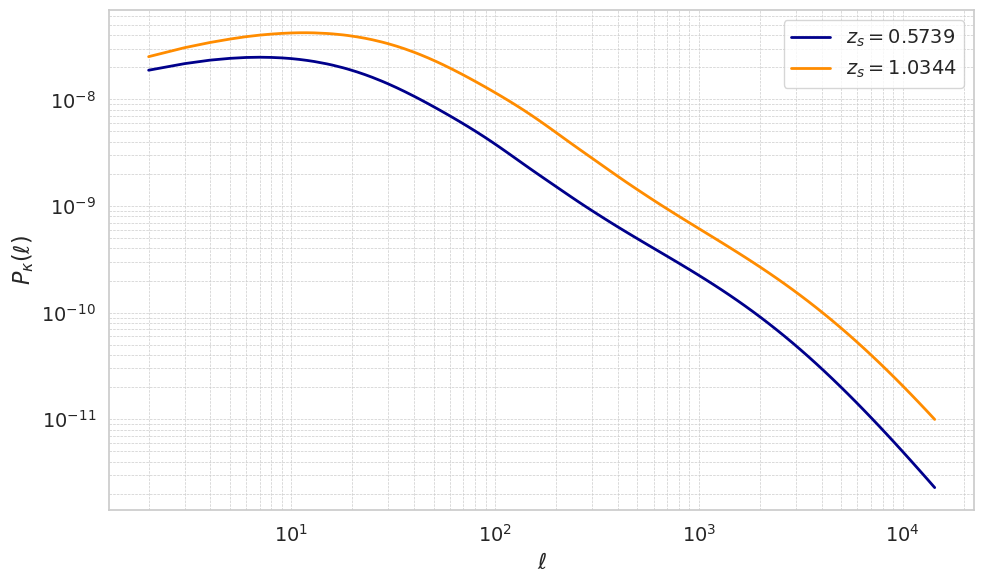

In [28]:
plt.figure(figsize=(10, 6))

# Plot with thicker line and clear label
plt.loglog(ell_centers, P2D_ell_1, label=fr'$z_s = {z_s_1}$', color='darkblue', linewidth=2)
plt.loglog(ell_centers, P2D_ell_2, label=fr'$z_s = {z_s_2}$', color='darkorange', linewidth=2)

# Axis labels and title
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$P_\kappa(\ell)$', fontsize=16)
# Grid and tick formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', labelsize=14)

# Legend
plt.legend(fontsize=14)

# Layout and save
plt.tight_layout()
plt.savefig("convergence_power_spectrum.png", dpi=300, bbox_inches='tight')
plt.show()

### Part of P1.6: Notes about the Kitching correction and interpolation

After all the previous exercises, we already have the projected convergence power spectrum at a discrete set of multipole numbers. Now we first have to interpolate the spectrum to a continuous set of integer numbers from 2 to 15000 so that the integrations in Eq.(57) and (58) can be computed using a summation. Then we have to apply the Kitching correction to convert the 2D flat spectrum to an angular spectrum  

In [29]:
print(len(ell_centers))
print(len(P2D_ell_1))

90
90


In [30]:
Pk2D = P2D_ell_1 # read in your previously computed 2D spectrum
l = ell_centers # write down the multipole number array at which you compute 2D spectrum in the previous exercise 
l1 = np.linspace(0, 15000, 15001)
l2 = np.linspace(2.5, 15000.5, 14999)

C_ell_1 = np.zeros(len(l1))
C_ell_1[0] = 0 # what should be the value here?
C_ell_1[1] = 0 # fill in the value here as well (check Eq.(39))
logl = np.log10(l)
logPk2D = np.log10(Pk2D)
f = interpolate.interp1d(logl, logPk2D, kind='linear', fill_value='extrapolate')
C_ell_1[2:] = 10**f(np.log10(l2))
#kitching correction: turn the power spectrum into the spherical sky under flat-sky approximation
for i in np.asarray(l2, dtype=int):
    C_ell_1[i] *= ((i + 2)*(i + 1)*i*(i - 1))/(i + 0.5)**4 # Follow Eq.(39) and try to put down the Kitching correction here

In [31]:
print(C_ell_1)

[0.00000000e+00 0.00000000e+00 1.24744119e-08 ... 2.08034695e-12
 2.08004408e-12 2.07974127e-12]


In [32]:
Pk2D = P2D_ell_2 # read in your previously computed 2D spectrum
l = ell_centers # write down the multipole number array at which you compute 2D spectrum in the previous exercise 
l1 = np.linspace(0, 15000, 15001)
l2 = np.linspace(2.5, 15000.5, 14999)

C_ell_2 = np.zeros(len(l1))
C_ell_2[0] = 0 # what should be the value here?
C_ell_2[1] = 0 # fill in the value here as well (check Eq.(39))
logl = np.log10(l)
logPk2D = np.log10(Pk2D)
f = interpolate.interp1d(logl, logPk2D, kind='linear', fill_value='extrapolate')
C_ell_2[2:] = 10**f(np.log10(l2))
#kitching correction: turn the power spectrum into the spherical sky under flat-sky approximation
for i in np.asarray(l2, dtype=int):
    C_ell_2[i] *= ((i + 2)*(i + 1)*i*(i - 1))/(i + 0.5)**4 # Follow Eq.(39) and try to put down the Kitching correction here

In [33]:
print(C_ell_2)

[0.00000000e+00 0.00000000e+00 1.71980413e-08 ... 9.11817591e-12
 9.11692630e-12 9.11567695e-12]


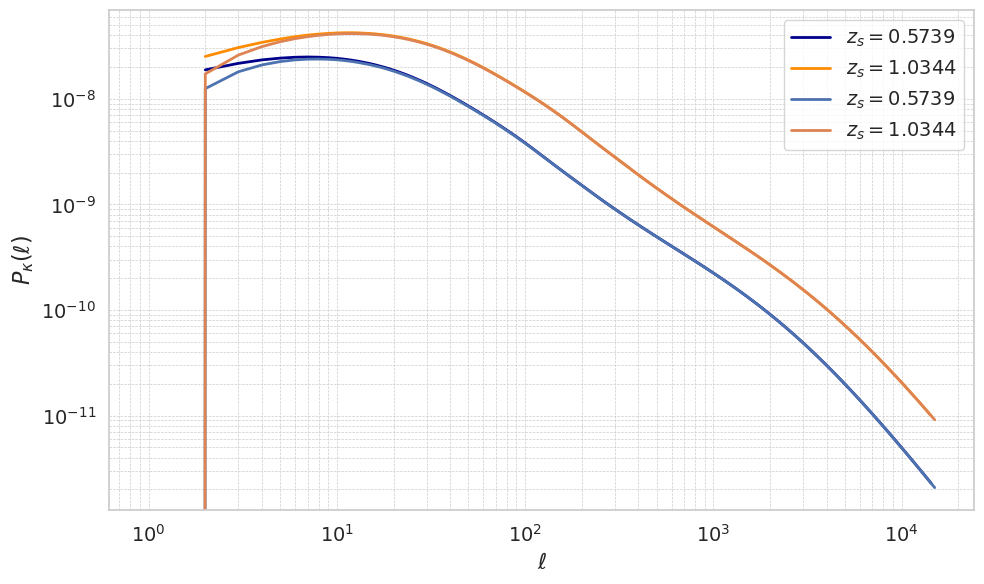

In [43]:
plt.figure(figsize=(10, 6))

# Plot with thicker line and clear label
plt.loglog(ell_centers, P2D_ell_1, label=fr'$z_s = {z_s_1}$', color='darkblue', linewidth=2)
plt.loglog(ell_centers, P2D_ell_2, label=fr'$z_s = {z_s_2}$', color='darkorange', linewidth=2)
plt.loglog(l1, C_ell_1, label=fr'$z_s = {z_s_1}$', linewidth=2)
plt.loglog(l1, C_ell_2, label=fr'$z_s = {z_s_2}$', linewidth=2)

# Axis labels and title
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$P_\kappa(\ell)$', fontsize=16)
# Grid and tick formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', labelsize=14)

# Legend
plt.legend(fontsize=14)

# Layout and save
plt.tight_layout()
plt.savefig("convergence_power_spectrum.png", dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# Write your code here. Add more coding cells as needed.

# P1.6

### Part of P1.6: Notes about the Hankel transform

The below two functions will compute the Hankel Transform of the 2D angular power spectrum and convert it to plus and minus shear 2PCFs respectively. 

In the function argument, theta_min and theta_max are the angular bin edges imported above. Here we will compute the average value of 2PCFs within each angular bin. ell is the multipole number array on which you compute the angular power spectrum and C_ell is the angular power spectrum

In [36]:
# Here you have to import three arrays of angular separations from the directory 2PCF_angular_separations
#1. The nominal center of each angular separation interval from 5 to 140 arcmin
#2. The right edge of each angular bin
#3. The left edge of each angular bin

In [37]:
theta_bins = np.loadtxt("2PCF_angular_separations/angularsep_arcmins_20bins.txt")
theta_max_bins = np.loadtxt("2PCF_angular_separations/angularsep_arcmins_max_20bins.txt")
theta_min_bins = np.loadtxt("2PCF_angular_separations/angularsep_arcmins_min_20bins.txt")

In [38]:
print(theta_bins)

[  5.43436688   6.41958357   7.58341386   8.95823931  10.58231199
  12.50081888  14.76713906  17.44432889  20.60687647  24.34277412
  28.75596662  33.96924328  40.12765435  47.40254678  55.99633165
  66.14811589  78.14035505  92.30671205 109.04134087 128.80985309]


In [39]:
print(P2D_ell_1)

[1.87785467e-08 2.16407758e-08 2.33394401e-08 2.42549749e-08
 2.47237155e-08 2.48590169e-08 2.47534714e-08 2.45052999e-08
 2.41462088e-08 2.36946394e-08 2.31896341e-08 2.26562741e-08
 2.15220634e-08 2.09399686e-08 1.97886305e-08 1.92252830e-08
 1.81277493e-08 1.70893379e-08 1.61158938e-08 1.47734485e-08
 1.39602624e-08 1.28523592e-08 1.18680734e-08 1.07274587e-08
 9.98205356e-09 9.11424244e-09 8.19503165e-09 7.56799997e-09
 6.76831611e-09 6.10094684e-09 5.53452518e-09 4.97203663e-09
 4.42982856e-09 3.97182534e-09 3.53709689e-09 3.13523474e-09
 2.77293522e-09 2.45333693e-09 2.19491849e-09 1.95129489e-09
 1.72802224e-09 1.53651978e-09 1.37109623e-09 1.22152411e-09
 1.08385942e-09 9.69589618e-10 8.70066345e-10 7.80185290e-10
 6.99954761e-10 6.29221476e-10 5.68567281e-10 5.13565534e-10
 4.64117828e-10 4.19081281e-10 3.79013228e-10 3.42780728e-10
 3.10110905e-10 2.79909700e-10 2.52563342e-10 2.27312141e-10
 2.04419670e-10 1.83536697e-10 1.64262420e-10 1.46506408e-10
 1.30312356e-10 1.155663

In [40]:
def xip_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians    
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_p = G_l_2_+(x) + G_l_2_-(x) i.e. LHS of Friedrich++ for the 'p'lus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1] 
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2] 

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1] 
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2] 

    G_l_2_x_p_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            +2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            -2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_p_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

In [44]:
xip_vals = []
xim_vals = []

# --- Loop over all angular bins ---
for theta_min, theta_max in zip(theta_min_bins, theta_max_bins):
    xip = xip_theta_bin_averaged(theta_min, theta_max, P2D_ell_1, ell_centers)
    xim = xim_theta_bin_averaged(theta_min, theta_max, P2D_ell_1, ell_centers)
    xip_vals.append(xip)
    xim_vals.append(xim)

# --- Convert to NumPy arrays for further use ---
xip_vals = np.array(xip_vals)
xim_vals = np.array(xim_vals)

/tmp/ipykernel_1161/2767636119.py:16: DeprecationWarning: `scipy.special.lpn` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.legendre_p_all` instead.
  P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max


ValueError: n must be a non-negative integer

In [ ]:
def xim_theta_bin_averaged(theta_min, theta_max, ell, C_ell):
    '''
    theta_min and theta_max is in radians    
    assume ell starts from 0 and the values of C_ell at the first two multipoles (i.e. ell=0,1) are zero
    eqn (9) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    eqn (B5) of Friedrich++ 2020 DES covariance modelling --- https://arxiv.org/pdf/2012.08568.pdf
    here, G_l_2_x_m = G_l_2_+(x) - G_l_2_-(x) i.e. LHS of Friedrich++ for the 'm'inus middle sign
    '''

    l = ell[2:] # take the values from ell=2,...,ell_max for the summation below
    C_l = C_ell[2:]

    x_min = np.cos(theta_min)
    x_max = np.cos(theta_max)

    P_ell_x_min_array, ddx_P_ell_x_min_array = lpn(ell[-1]+1,x_min) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_min_array = P_ell_x_min_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_min_array = P_ell_x_min_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_min_array = P_ell_x_min_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_min_array = ddx_P_ell_x_min_array[2:-1] 
    ddx_P_lm1_x_min_array = ddx_P_ell_x_min_array[1:-2] 

    P_ell_x_max_array, ddx_P_ell_x_max_array = lpn(ell[-1]+1,x_max) # all the (first kind) Legendre polynomials and derivatives of degree ell, P_ell values from ell=0,1,2,...ell_max
    P_lp1_x_max_array = P_ell_x_max_array[3:] # take the values from ell=3,...,ell_max+1 for the summation below
    P_l_x_max_array = P_ell_x_max_array[2:-1] # take the values from ell=2,...,ell_max for the summation below
    P_lm1_x_max_array = P_ell_x_max_array[1:-2] # take the values from ell=1,...ell_max-1 for the summation below
    ddx_P_l_x_max_array = ddx_P_ell_x_max_array[2:-1] 
    ddx_P_lm1_x_max_array = ddx_P_ell_x_max_array[1:-2] 

    G_l_2_x_m_bin_averaged = 1./(x_min - x_max)*(
                            -l*(l-1.)/2.*(l+2./(2.*l+1.))*(P_lm1_x_min_array-P_lm1_x_max_array)
                            -l*(l-1.)*(2.-l)/2.*(x_min*P_l_x_min_array-x_max*P_l_x_max_array)
                            +l*(l-1.)/(2.*l+1.)*(P_lp1_x_min_array-P_lp1_x_max_array)
                            +(4.-l)*(ddx_P_l_x_min_array-ddx_P_l_x_max_array)
                            +(l+2.)*(x_min*ddx_P_lm1_x_min_array-x_max*ddx_P_lm1_x_max_array-(P_lm1_x_min_array-P_lm1_x_max_array))
                            -2.*(l-1.)*(x_min*ddx_P_l_x_min_array-x_max*ddx_P_l_x_max_array-(P_l_x_min_array-P_l_x_max_array))
                            +2.*(l+2.)*(ddx_P_lm1_x_min_array-ddx_P_lm1_x_max_array)
                             )

    return np.sum( (2.*l+1) / (4*np.pi) * 2. * G_l_2_x_m_bin_averaged / (l*l*(l+1.)*(l+1.)) * C_l )

In [ ]:
# In this cell you have to think how to use the above two functions to compute the angular bin averaged shear 2PCFs
# hint: you need to loop over angular bins